## Import the necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the File

In [1]:
file_path = '/content/sample_data/creditcard.csv'
df = pd.read_csv(file_path)

NameError: name 'pd' is not defined

# Data Preprocessing

## Display the first few rows of the DataFrame

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(109025, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109025 entries, 0 to 109024
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    109025 non-null  int64  
 1   V1      109025 non-null  float64
 2   V2      109025 non-null  float64
 3   V3      109025 non-null  float64
 4   V4      109025 non-null  float64
 5   V5      109025 non-null  float64
 6   V6      109025 non-null  float64
 7   V7      109025 non-null  float64
 8   V8      109025 non-null  float64
 9   V9      109025 non-null  float64
 10  V10     109025 non-null  float64
 11  V11     109025 non-null  float64
 12  V12     109025 non-null  float64
 13  V13     109025 non-null  float64
 14  V14     109025 non-null  float64
 15  V15     109025 non-null  float64
 16  V16     109025 non-null  float64
 17  V17     109025 non-null  float64
 18  V18     109025 non-null  float64
 19  V19     109025 non-null  float64
 20  V20     109025 non-null  float64
 21  V21     10

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,...,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000
mean,44645.276707,-0.256883,-0.025148,0.682026,0.156138,-0.283840,0.096437,-0.115878,0.058907,-0.058148,...,-0.031439,-0.108487,-0.037077,0.010548,0.133002,0.025850,0.001697,0.001575,95.976655,0.002192
std,17910.956447,1.851918,1.646552,1.312689,1.342222,1.345002,1.297956,1.204303,1.228831,1.107857,...,0.739326,0.639778,0.625171,0.595426,0.439685,0.491488,0.392049,0.319122,259.985100,0.046770
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,34466.000000,-1.022536,-0.594704,0.176662,-0.711427,-0.906796,-0.647201,-0.604942,-0.134455,-0.698260,...,-0.224526,-0.535608,-0.176381,-0.323376,-0.130809,-0.323685,-0.061028,-0.004984,7.000000,0.000000
50%,46486.000000,-0.260725,0.078851,0.757593,0.184474,-0.318199,-0.156136,-0.071019,0.077647,-0.124576,...,-0.057137,-0.084788,-0.049097,0.066487,0.170840,-0.068262,0.010695,0.023386,25.000000,0.000000
75%,59079.000000,1.155066,0.739987,1.381997,1.021482,0.243535,0.490683,0.410307,0.368885,0.536933,...,0.120029,0.312712,0.080875,0.407577,0.420394,0.293750,0.084706,0.076715,86.982500,0.000000
max,71184.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
# sns.pairplot(df,hue='Class',palette='Set1')

## Handing missing values using SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy to replace missing values with the mean

imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the DataFrame and transform the data to fill missing values
# Convert the result back to a DataFrame with the original columns
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Missing values after imputation:\n", df_imputed.isnull().sum())

Missing values after imputation:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Determine number of fraud cases in dataset

In [ ]:
fraud = df_imputed[df_imputed['Class'] == 1].astype(int)
valid = df_imputed[df_imputed['Class'] == 0].astype(int)
outlierFraction = len(fraud) / float(len(valid))

print(f'Outlier Fraction: {outlierFraction}')
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Outlier Fraction: 0.0021969940708737416
Fraud Cases: 239
Valid Transactions: 108785


#### Printing amount details of fraud transactions

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     239.000000
mean      119.292887
std       255.623061
min         0.000000
25%         1.000000
50%         7.000000
75%        99.000000
max      1809.000000
Name: Amount, dtype: float64

#### Printing amount details of normal transactions

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    108785.000000
mean         95.449832
std         260.020765
min           0.000000
25%           7.000000
50%          25.000000
75%          86.000000
max       19656.000000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

## Correlation matrix

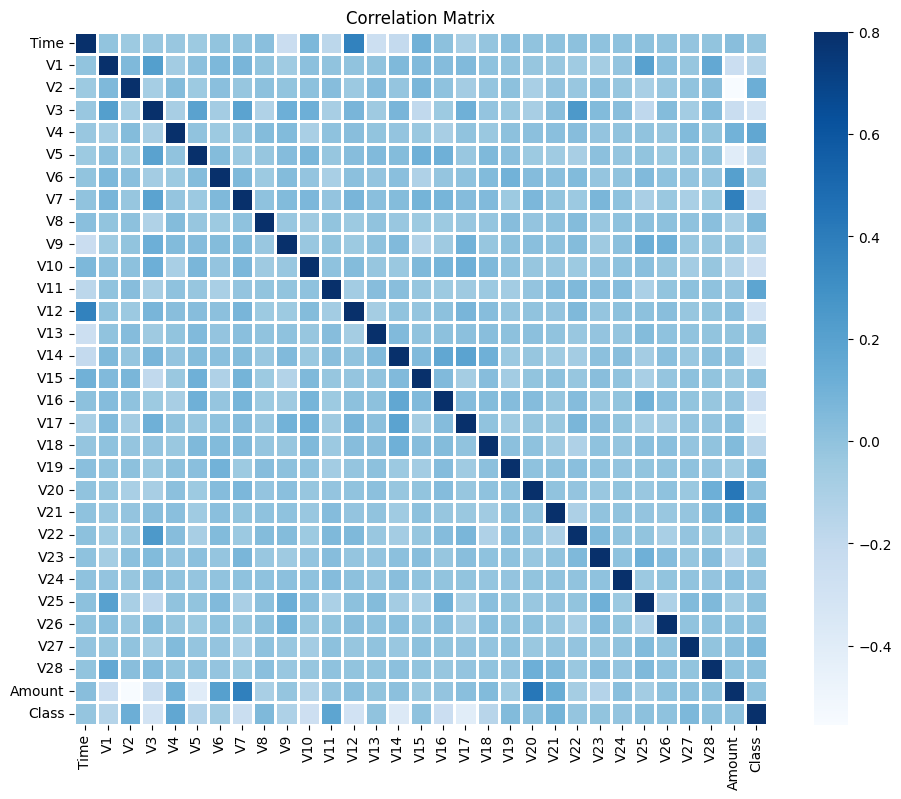

In [ ]:
# Calculate the correlation matrix
corrmat = df.corr()

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 9))

# Create a heatmap of the correlation matrix with specified figure size
sns.heatmap(corrmat, vmax=.8, square=True, cmap='Blues',linewidths=0.75, linecolor='white')
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = df_imputed.drop(['Class'], axis = 1)
Y = df_imputed["Class"].astype(int)
print(X.shape)
print(Y.shape)

(109025, 30)
(109025,)


In [ ]:
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y

## Train Test and Split

In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.impute import SimpleImputer # Import imputer to handle missing values

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Handle any potential missing values in train/test sets separately
# Impute missing values in X_train and X_test using the mean
X_train_imputed = imputer.fit_transform(xTrain)
X_test_imputed = imputer.transform(xTest)

# SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create and train the SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, yTrain)

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, yTrain)

# Make predictions on the test set
yPred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
report = classification_report(yTest, yPred)

print("Random Forest Classifier Model")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Random Forest Classifier Model
Accuracy: 0.99764583588113
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32636
           1       0.47      0.65      0.55        72

    accuracy                           1.00     32708
   macro avg       0.74      0.83      0.77     32708
weighted avg       1.00      1.00      1.00     32708



### Confusion Matrix

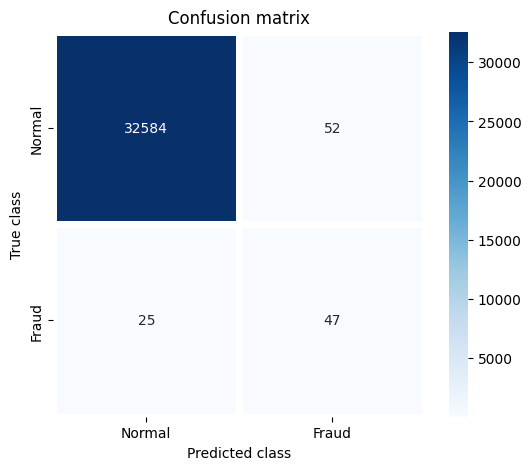

In [ ]:
from sklearn.metrics import confusion_matrix # Import confusion matrix

# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d", cmap='Blues', linewidths=5);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()